In [69]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [70]:
#loading data 

ab_nyc=pd.read_csv('C:/Python/AB_NYC_2019.csv')

In [71]:
ab_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [72]:
ab_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [73]:
ab_nyc.shape

(48895, 16)

Data processing

In [74]:
# remove redundant columns
ab_nyc.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [75]:
#replace na values in 'reviews per month'by 0
ab_nyc.fillna({'reviews_per_month':0}, inplace=True)

In [78]:
#remove Na 
ab_nyc.isnull().sum()
ab_nyc.dropna(how='any',inplace=True)
ab_nyc.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Exploratory Data Analysis


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

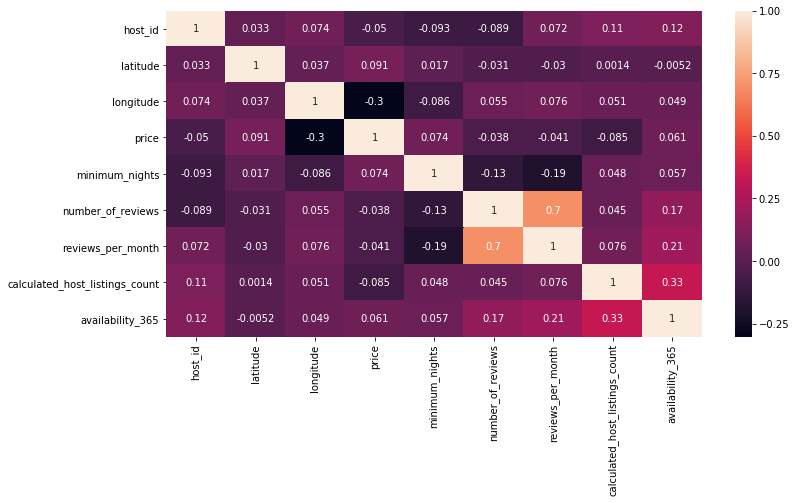

In [68]:
#correlation map
corr = ab_nyc.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
ab_nyc.columns


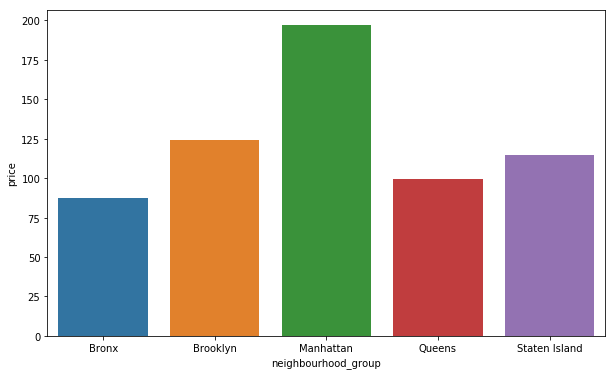

In [25]:
#relation between neighbourhood group and price
avg_=ab_nyc.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['neighbourhood_group'], avg_['price'])

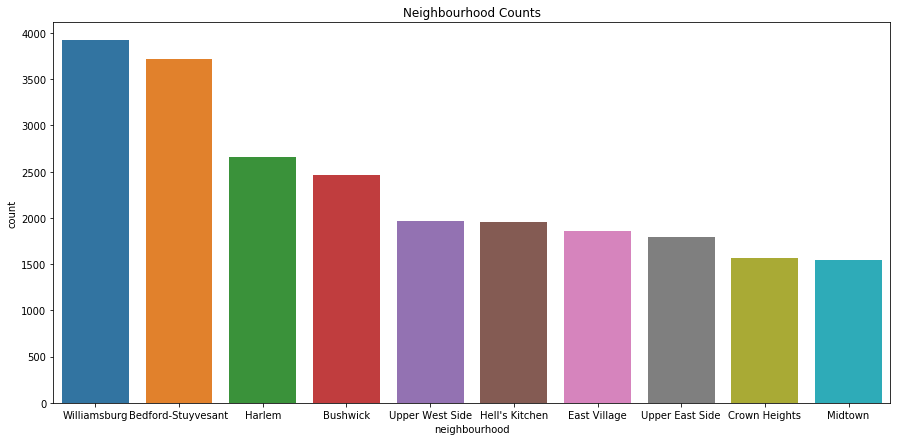

In [26]:
#Top neighbourhood
plt.figure(1, figsize=(15, 7))
plt.title("Neighbourhood Counts")
sns.countplot(x = "neighbourhood", order=ab_nyc['neighbourhood'].value_counts().index[0:10] ,data=ab_nyc)

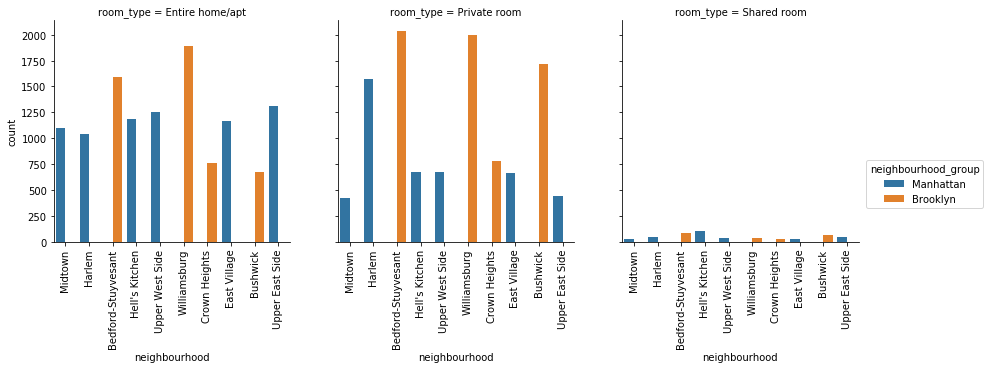

In [27]:
#roomtype
#taking top 10 neighbourhoods
neighbour=ab_nyc.loc[ab_nyc['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                                               'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side',
                                               'Crown Heights','Midtown'])]
#using factorplot to represent multiple interesting attributes together and a count
plot=sns.factorplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighbour, kind='count')
plot.set_xticklabels(rotation=90)

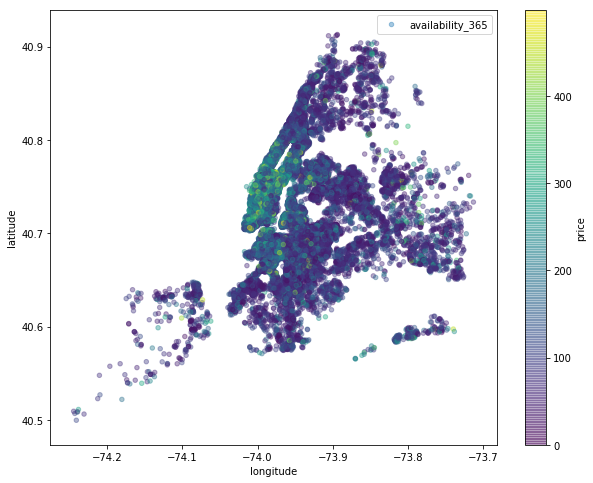

In [28]:
#Price map
pricemap=ab_nyc[ab_nyc.price<500]
plot=pricemap.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap(), colorbar=True, alpha=0.4, figsize=(10,8))

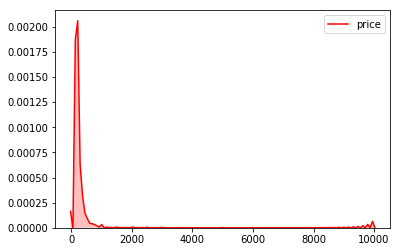

In [29]:
#distribution of price
sns.kdeplot(ab_nyc['price'],shade=True,color='r')

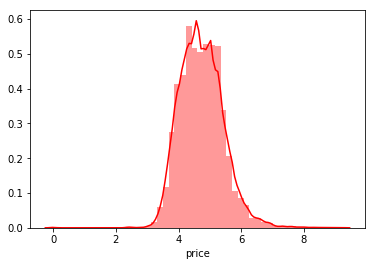

In [30]:
#normalize price
import scipy.stats as stats
sns.distplot(np.log1p(ab_nyc['price']),color='r')

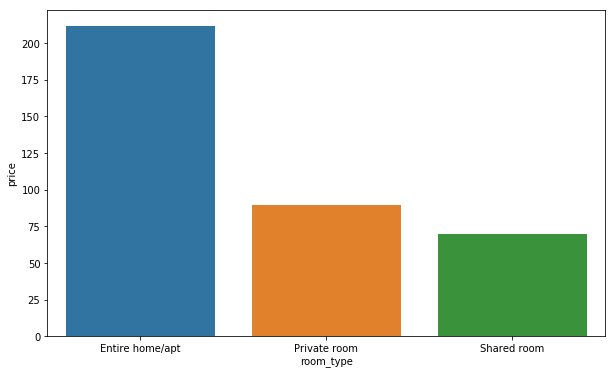

In [37]:
#relation between neighbourhood group and price
avg_room=ab_nyc.groupby('room_type',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_room['room_type'], avg_room['price'])

In [34]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=ab_nyc.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


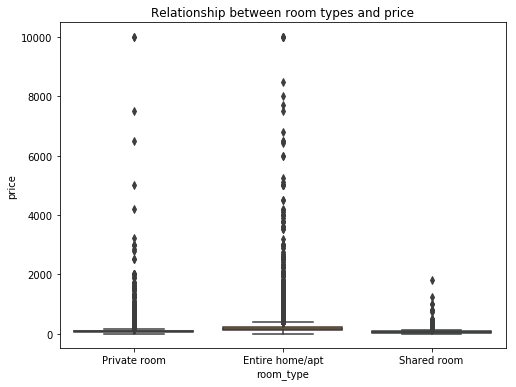

In [35]:
#room type with price
plt.subplots(figsize=(8, 6))
plt.title('Relationship between room types and price')
fig=sns.boxplot(ab_nyc['room_type'],ab_nyc['price'])

Model Selection

In [38]:
#Drop columns
ab_nyc.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
ab_nyc.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [40]:
#Encode the input Variables
def Encode(ab_nyc):
    for column in ab_nyc.columns[ab_nyc.columns.isin(['neighbourhood_group', 'room_type'])]:
        ab_nyc[column] = ab_nyc[column].factorize()[0]
    return ab_nyc

ab_en = Encode(ab_nyc.copy())

In [41]:
ab_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [44]:
#Defining the independent variables and dependent variables
x = ab_en.iloc[:,[0,1,3,4,5]]
y = ab_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [51]:
#Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
pred_lr=reg.predict(x_test)
rmse_lr=np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr=r2_score(y_test,pred_lr)
print(rmse_lr)
print(r2_lr)

176.58337510434393
0.07480306392848757


In [52]:
# lasso 

lasso = Pipeline((
('scaler', StandardScaler()),
('estimator', LassoCV(cv=5)),

))
lasso.fit(x_train,y_train)
#prediction
pred_lasso=lasso.predict(x_test)   
#evaluation
rmse_lasso= np.sqrt(mean_squared_error(y_test, pred_lasso))
r2_lasso=r2_score(y_test,predict_lasso)
print (rmse_lasso)
print(r2_lasso)


176.58617746682094
0.0747736981090924


In [54]:
#  ridge reg 
alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge.fit(x_train, y_train)
#prection
pred_ridge = ridge.predict(x_test)   
#evaluation
n = 200
rmse_ridge= np.sqrt(mean_squared_error(y_test, pred_ridge))
r2_ridge=r2_score(y_test,pred_ridge)
print (rmse_ridge)
print(r2_ridge)

176.5715678822008
0.07492678611386117


In [56]:
# Random Forest Regression

# search of turning para in small  n_estimators

model = RandomForestRegressor(n_estimators=100)
tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1,x_train.shape[1], 1),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 16, return_train_score=False, n_jobs=1,
                              random_state = 20)
rf_search.fit(x_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')



Best parameters found by randomised search: {'min_samples_leaf': 5, 'max_features': 2} 



In [57]:
# use n_estimators evaluated the rmse 

rf.n_estimators = 500
rf.fit(x_train, y_train)
#forecast
pred_rf =rf.predict(x_test)   
#evaluation
rmse_rf= np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf=r2_score(y_test,pred_rf)
print (rmse_rf)
print(r2_rf)

161.56591350059264
0.22547749746473067


In [58]:
# Elastic Net
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(x_train, y_train)

enet.l1_ratio_



enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)),
))

enet.fit(x_train, y_train)
#prediction
pred_enet =enet.predict(x_test)  
#evaluation 
rmse_en= np.sqrt(mean_squared_error(y_test, pred_enet))
r2_en=r2_score(y_test,pred_enet)
print (rmse_en)
print(r2_en)

176.57957784351464
0.07484285449550376


In [59]:
# bagging
bag = BaggingRegressor(n_estimators=1000, random_state=1)
bag.fit(x_train ,y_train)
#prediction
pred_bag =bag.predict(x_test) 
#evluation  
rmse_bag= np.sqrt(mean_squared_error(y_test, pred_bag))
r2_bag=r2_score(y_test,pred_bag)
print (rmse_bag)
print(r2_bag)

178.10512029538702
0.05878818723797885
